In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [3]:
df = pd.read_csv('bus_table.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

In [4]:
df_null = df[df.isnull().any(axis=1)]
print(df_null.shape)
dfnotna = df.copy()
dfnotna = dfnotna.dropna()
dfnotna

(240, 5)


,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку.
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [5]:
dfnotna['table'] = dfnotna['data']+' '+dfnotna['scheduled']
dfnotna['arrival'] = dfnotna['data']+' '+dfnotna['actual']

dfnotna['table'] = pd.to_datetime(dfnotna.table)
dfnotna['arrival'] = pd.to_datetime(dfnotna.arrival)
dfnotna

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

In [6]:
dfsort = dfnotna.sort_values(by=['route','direction','table'])
dfsort['inteval'] = dfsort['table'].diff().apply(lambda x: x / np.timedelta64(1, 'm'))

dfsort1 = dfnotna.sort_values(by=['route','direction','arrival'])
dfsort['arr_inteval'] = dfsort1['arrival'].diff().apply(lambda x: x / np.timedelta64(1, 'm'))

dfsortcount=dfsort.groupby(['route','direction'])['inteval'].value_counts()
dfsortcountDf = dfsortcount.reset_index()

top_3_routes = dfsortcountDf.groupby(['route','direction']).head(3)

top_3_routes.set_index(['route', 'direction'], inplace=True)

display(top_3_routes)

inteval  count
route direction                
A     north         12.0   1434
      north         15.0   1377
      north          7.0    756
      south         15.0   1453
      south         12.0   1312
      south          8.0    710
B     north         15.0   1507
      north         12.0   1413
      north          8.0   1141
      south         15.0   1391
      south         12.0   1300
      south          8.0   1159
C     north         10.0   1869
      north         15.0    590
      north          6.0    552
      south         10.0   1342
      south         12.0   1087
      south         15.0   1049

In [7]:
display(dfsort)

,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


## Задание 5
Найдите время в минутах для опоздания авдобуса (+ задержка, - раньше расписания)

In [8]:
dfsort['late']=dfsort['arrival']-dfsort['table']

mask = dfsort['arrival'] < dfsort['table']
dfsort['late'][mask] = dfsort['table']-dfsort['arrival']

dfsort['late']=dfsort['late'].apply(lambda x: x / np.timedelta64(1, 'm'))

dfsort['late'][mask] *= -1
dfsort

<ipython-input-8-a59ecfd589ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsort['late'][mask] = dfsort['table']-dfsort['arrival']
<ipython-input-8-a59ecfd589ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsort['late'][mask] *= -1


,data,route,direction,scheduled,actual,table,arrival,inteval,arr_inteval,late
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.600000
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000,-0.100000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333,4.833333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667,8.750000
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000,-0.650000
...,...,...,...,...,...,...,...,...,...,...
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000,4.633333
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667,-0.600000
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667,1.316667
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333,5.650000


In [9]:
# при переходе через сутки получалась слишком большая/минусовая задержка на сутки, фиксим
dfsort['late'] = dfsort['late'].apply(lambda x: x+1440 if x<-200 else x)
dfsort['late'] = dfsort['late'].apply(lambda x: x-1440 if x>200 else x)

## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

In [10]:
dfsort = dfsort.dropna()
dfsort = dfsort[(dfsort['inteval']>0) & (dfsort['arr_inteval']>0)] # 5 строк были с отрицательным интервалом, несмотря на сортировку, выбросы?

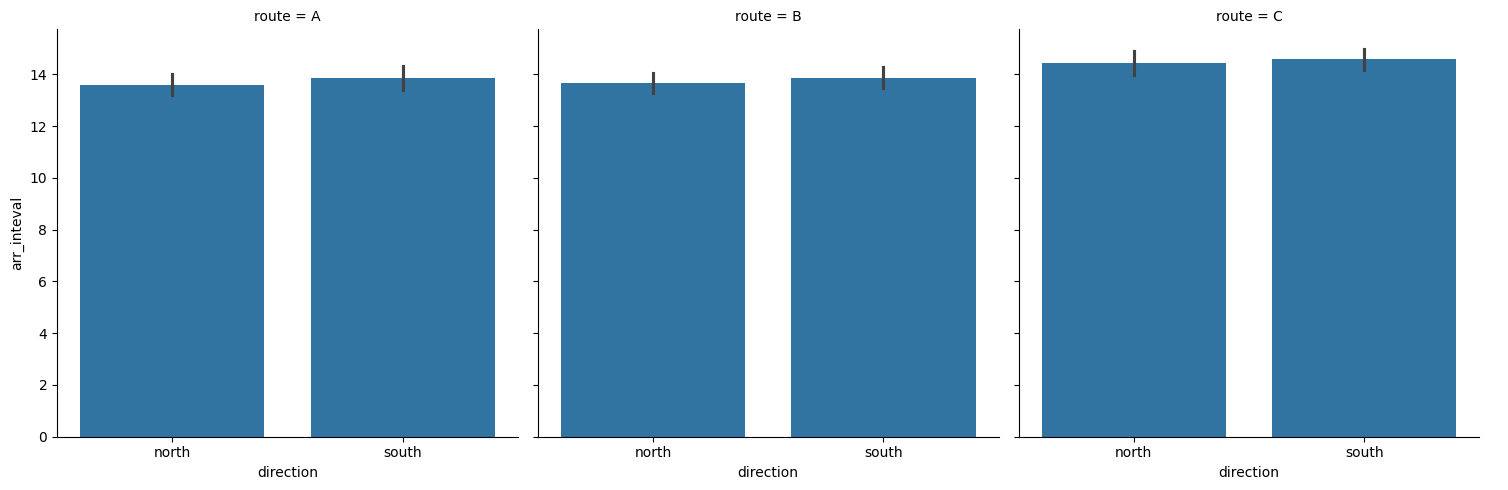

,table,arrival,inteval,arr_inteval,late
count,38878,38878,38878.000000,38878.000000,38878.000000
mean,2016-04-26 18:40:18.248520960,2016-04-26 18:40:31.460414464,13.993003,13.994566,1.479522
min,2016-03-26 00:30:25,2016-03-26 00:30:19,1.000000,0.016667,-12.866667
25%,2016-04-11 07:26:02,2016-04-11 07:26:53.500000,8.000000,7.550000,-0.983333
50%,2016-04-26 17:15:14.500000,2016-04-26 17:17:20,12.000000,11.516667,0.516667
75%,2016-05-12 13:03:45,2016-05-12 13:01:44.249999872,15.000000,15.350000,2.712500
max,2016-05-27 23:59:58,2016-05-27 23:57:15,314.000000,314.116667,150.283333
std,NaN,NaN,17.451108,17.889288,4.944656


In [11]:
g = sns.catplot(x="direction", y="arr_inteval",
                data=dfsort, kind="bar",
                col='route')
plt.show()
dfsort.describe()

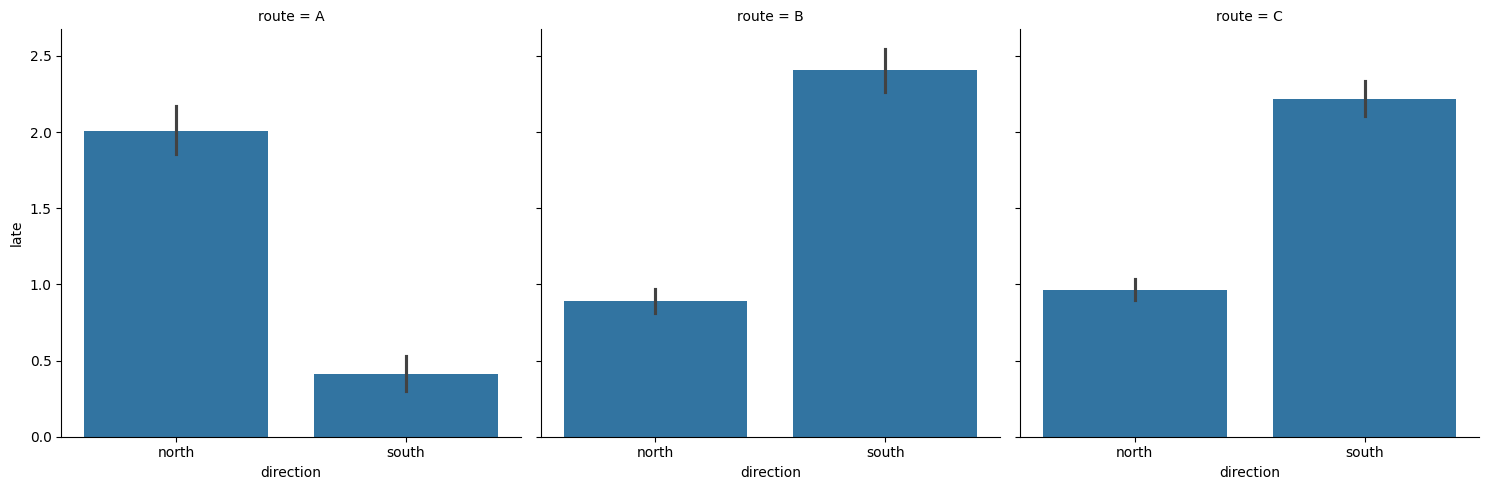

In [12]:
g = sns.catplot(x="direction", y="late",
                data=dfsort, kind="bar",
                col='route')
plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

Интервалы движения на всех направлениях +- равны, время опоздания разнится внутри рутов, например, рейсы в руте А на север опаздывают в 4 раза дольше, чем на юг.
